In [144]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score


from IPython.display import Image
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


shelter_cpi = pd.read_csv('/Users/mustafa/Desktop/project4_team2/consumer_price_index_shelter.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Shelter'})
mort_int_cpi = pd.read_csv('/Users/mustafa/Desktop/project4_team2/consumer_price_index_mort_int.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Mortgage_and_Interest'})
gasoline_cpi = pd.read_csv('/Users/mustafa/Desktop/project4_team2/consumer_price_index_gasoline.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Gasoline'})
food_cpi = pd.read_csv('/Users/mustafa/Desktop/project4_team2/consumer_price_index_food.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Food'})
energy_cpi = pd.read_csv('/Users/mustafa/Desktop/project4_team2/consumer_price_index_energy.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Energy'})
all_items_cpi = pd.read_csv('/Users/mustafa/Desktop/project4_team2/consumer_price_index_all_items.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'All_items'})
grains_and_oilseeds = pd.read_csv('/Users/mustafa/Desktop/project4_team2/3210009801_databaseLoadingData (2).csv')


In [145]:

food_cpi.fillna(food_cpi.select_dtypes(include=['number']).mean(), inplace=True)
shelter_cpi.fillna(shelter_cpi.select_dtypes(include=['number']).mean(), inplace=True)
mort_int_cpi.fillna(mort_int_cpi.select_dtypes(include=['number']).mean(), inplace=True)
gasoline_cpi.fillna(gasoline_cpi.select_dtypes(include=['number']).mean(), inplace=True)
energy_cpi.fillna(energy_cpi.select_dtypes(include=['number']).mean(), inplace=True)
grains_and_oilseeds.fillna(grains_and_oilseeds.select_dtypes(include=['number']).mean(), inplace=True)



In [146]:

df_food_price = pd.merge(grains_and_oilseeds, all_items_cpi, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, energy_cpi, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, food_cpi, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, gasoline_cpi, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, mort_int_cpi, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, shelter_cpi, on='REF_DATE', how='left')

In [147]:
df_food_price


,REF_DATE,GEO,DGUID,Commodity groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,...,STATUS,SYMBOL,TERMINATED,DECIMALS,All_items,Energy,Food,Gasoline,Mortgage_and_Interest,Shelter
0,2007-01,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.30,...,NaN,NaN,NaN,1,109.4,125.2,110.9,126.4,-0.3,114.8
1,2007-01,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.30,...,NaN,NaN,NaN,1,110.9,125.2,110.9,126.4,-0.3,114.8
2,2007-01,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.30,...,NaN,NaN,NaN,1,114.8,125.2,110.9,126.4,-0.3,114.8
3,2007-01,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.30,...,NaN,NaN,NaN,1,102.4,125.2,110.9,126.4,-0.3,114.8
4,2007-01,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.30,...,NaN,NaN,NaN,1,94.2,125.2,110.9,126.4,-0.3,114.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88123,2023-12,Western Canada,NaN,Unprocessed milk [A25],"Index, 2007=100",181,units,0,v66449969,9.14,...,NaN,NaN,NaN,1,155.2,197.0,186.8,211.3,-0.4,177.8
88124,2023-12,Western Canada,NaN,Unprocessed milk [A25],"Index, 2007=100",181,units,0,v66449969,9.14,...,NaN,NaN,NaN,1,156.3,197.0,186.8,211.3,-0.4,177.8
88125,2023-12,Western Canada,NaN,Unprocessed milk [A25],"Index, 2007=100",181,units,0,v66449969,9.14,...,NaN,NaN,NaN,1,197.0,197.0,186.8,211.3,-0.4,177.8
88126,2023-12,Western Canada,NaN,Unprocessed milk [A25],"Index, 2007=100",181,units,0,v66449969,9.14,...,NaN,NaN,NaN,1,143.1,197.0,186.8,211.3,-0.4,177.8


In [148]:
df_food_price.info()
df_food_price.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REF_DATE               88128 non-null  object 
 1   GEO                    88128 non-null  object 
 2   DGUID                  29376 non-null  object 
 3   Commodity groups       88128 non-null  object 
 4   UOM                    88128 non-null  object 
 5   UOM_ID                 88128 non-null  int64  
 6   SCALAR_FACTOR          88128 non-null  object 
 7   SCALAR_ID              88128 non-null  int64  
 8   VECTOR                 88128 non-null  object 
 9   COORDINATE             88128 non-null  float64
 10  VALUE                  88128 non-null  float64
 11  STATUS                 0 non-null      float64
 12  SYMBOL                 0 non-null      float64
 13  TERMINATED             0 non-null      float64
 14  DECIMALS               88128 non-null  int64  
 15  Al

Index(['REF_DATE', 'GEO', 'DGUID', 'Commodity groups', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS', 'All_items', 'Energy', 'Food',
       'Gasoline', 'Mortgage_and_Interest', 'Shelter'],
      dtype='object')

In [149]:
columns_to_drop = ['DGUID', 'SCALAR_FACTOR', 'UOM', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
df_food_price = df_food_price.drop(columns=columns_to_drop, axis=1)
df_food_price.head()

,REF_DATE,GEO,Commodity groups,VALUE,All_items,Energy,Food,Gasoline,Mortgage_and_Interest,Shelter
0,2007-01,Canada,Grains [A11],77.4,109.4,125.2,110.9,126.4,-0.3,114.8
1,2007-01,Canada,Grains [A11],77.4,110.9,125.2,110.9,126.4,-0.3,114.8
2,2007-01,Canada,Grains [A11],77.4,114.8,125.2,110.9,126.4,-0.3,114.8
3,2007-01,Canada,Grains [A11],77.4,102.4,125.2,110.9,126.4,-0.3,114.8
4,2007-01,Canada,Grains [A11],77.4,94.2,125.2,110.9,126.4,-0.3,114.8


In [150]:
df_food_price.columns

Index(['REF_DATE', 'GEO', 'Commodity groups', 'VALUE', 'All_items', 'Energy',
       'Food', 'Gasoline', 'Mortgage_and_Interest', 'Shelter'],
      dtype='object')

In [151]:

df_food_price['REF_DATE'] = pd.to_datetime(df_food_price['REF_DATE'])


df_food_price['Year'] = df_food_price['REF_DATE'].dt.year
df_food_price['Month'] = df_food_price['REF_DATE'].dt.month


df_food_price.drop('REF_DATE', axis=1, inplace=True)

In [188]:

df_food_price.columns = df_food_price.columns.str.lower().str.replace(' ', '_')

df_food_price
df_food_price.head()

,geo,commodity_groups,value,all_items,energy,food,gasoline,mortgage_and_interest,shelter,year,month
0,Canada,Grains [A11],77.4,109.4,125.2,110.9,126.4,-0.3,114.8,2007,1
1,Canada,Grains [A11],77.4,110.9,125.2,110.9,126.4,-0.3,114.8,2007,1
2,Canada,Grains [A11],77.4,114.8,125.2,110.9,126.4,-0.3,114.8,2007,1
3,Canada,Grains [A11],77.4,102.4,125.2,110.9,126.4,-0.3,114.8,2007,1
4,Canada,Grains [A11],77.4,94.2,125.2,110.9,126.4,-0.3,114.8,2007,1


In [153]:
df_food_price.columns

Index(['geo', 'commodity_groups', 'value', 'all_items', 'energy', 'food',
       'gasoline', 'mortgage_and_interest', 'shelter', 'year', 'month'],
      dtype='object')

In [154]:
df_food_price['commodity_groups'].unique()

array(['Grains [A11]', 'Oilseeds [A12]', 'Specialty crops [A13]',
       'Fresh fruit [A14]',
       'Fresh vegetables (except potatoes and pulse crops) [A15]',
       'Fresh potatoes [A16]', 'Eggs in shell [A24]',
       'Unprocessed milk [A25]'], dtype=object)

# Exploratory Analysis

In [155]:
import pandas as pd
import plotly.express as px



In [156]:
df_food_price.columns


Index(['geo', 'commodity_groups', 'value', 'all_items', 'energy', 'food',
       'gasoline', 'mortgage_and_interest', 'shelter', 'year', 'month'],
      dtype='object')

In [157]:
df_food_price['geo'].unique()

array(['Canada', 'Eastern Canada', 'Western Canada'], dtype=object)

In [158]:
df_food_price['commodity_groups'].unique()

array(['Grains [A11]', 'Oilseeds [A12]', 'Specialty crops [A13]',
       'Fresh fruit [A14]',
       'Fresh vegetables (except potatoes and pulse crops) [A15]',
       'Fresh potatoes [A16]', 'Eggs in shell [A24]',
       'Unprocessed milk [A25]'], dtype=object)

In [159]:
selected_commodity_groups = ['Grains [A11]', 'Oilseeds [A12]']
filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]


In [160]:
filtered_df



,geo,commodity_groups,value,all_items,energy,food,gasoline,mortgage_and_interest,shelter,year,month
0,Canada,Grains [A11],77.4,109.4,125.2,110.9,126.4,-0.3,114.8,2007,1
1,Canada,Grains [A11],77.4,110.9,125.2,110.9,126.4,-0.3,114.8,2007,1
2,Canada,Grains [A11],77.4,114.8,125.2,110.9,126.4,-0.3,114.8,2007,1
3,Canada,Grains [A11],77.4,102.4,125.2,110.9,126.4,-0.3,114.8,2007,1
4,Canada,Grains [A11],77.4,94.2,125.2,110.9,126.4,-0.3,114.8,2007,1
...,...,...,...,...,...,...,...,...,...,...,...
66091,Western Canada,Oilseeds [A12],193.9,155.2,197.0,186.8,211.3,-0.4,177.8,2023,12
66092,Western Canada,Oilseeds [A12],193.9,156.3,197.0,186.8,211.3,-0.4,177.8,2023,12
66093,Western Canada,Oilseeds [A12],193.9,197.0,197.0,186.8,211.3,-0.4,177.8,2023,12
66094,Western Canada,Oilseeds [A12],193.9,143.1,197.0,186.8,211.3,-0.4,177.8,2023,12


In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/dt/k7j_g60901q6ljz3_ydjrw900000gp/T/ipykernel_32450/3490194758.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futu

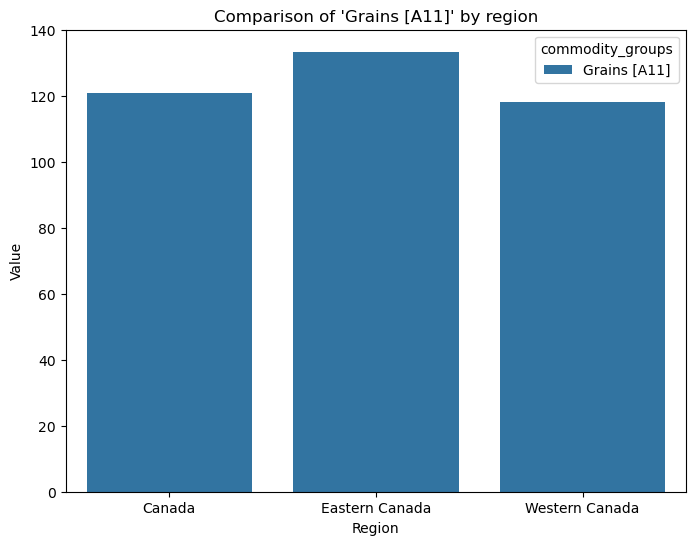

In [162]:
selected_commodity_groups = ['Grains [A11]']
filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]

plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='geo', y='value', hue='commodity_groups', ci=None)
plt.title("Comparison of 'Grains [A11]' by region")
plt.xlabel('Region')
plt.ylabel('Value')
plt.show()

/var/folders/dt/k7j_g60901q6ljz3_ydjrw900000gp/T/ipykernel_32450/3615137791.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futu

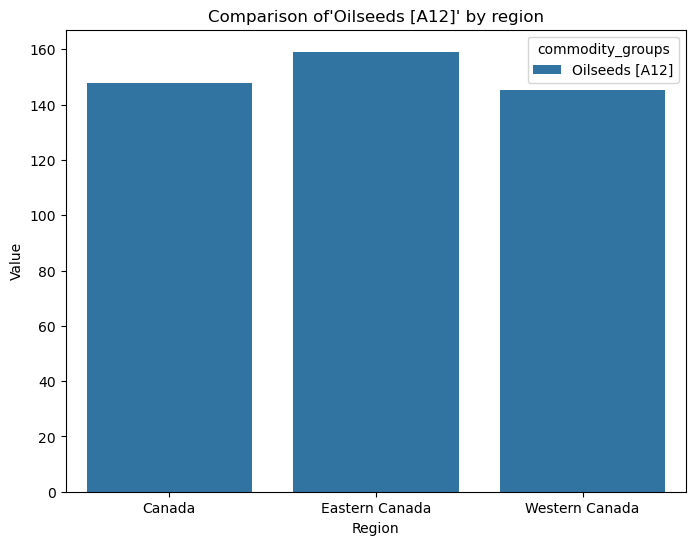

In [163]:
selected_commodity_groups = ['Oilseeds [A12]']
filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]

plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='geo', y='value', hue='commodity_groups', ci=None)
plt.title("Comparison of'Oilseeds [A12]' by region")
plt.xlabel('Region')
plt.ylabel('Value')
plt.show()

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype

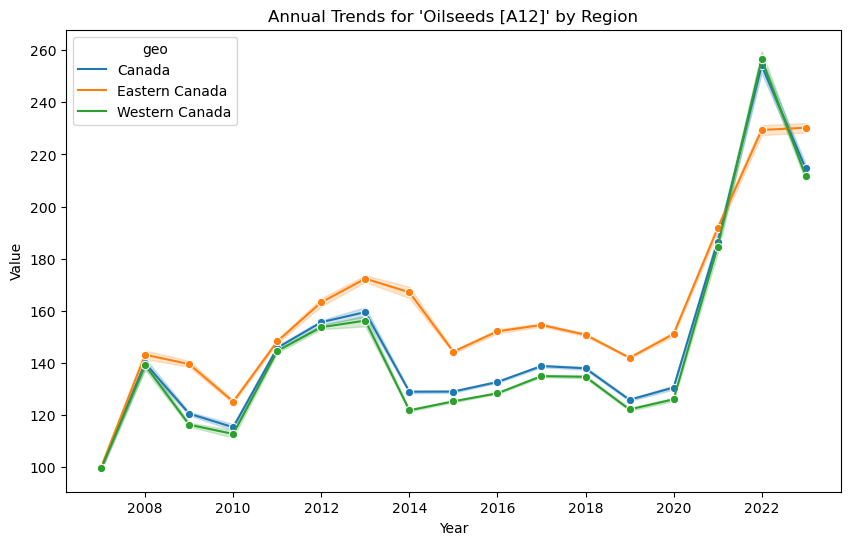

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='value', hue='geo', marker='o')
plt.title("Annual Trends for 'Oilseeds [A12]' by Region")
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



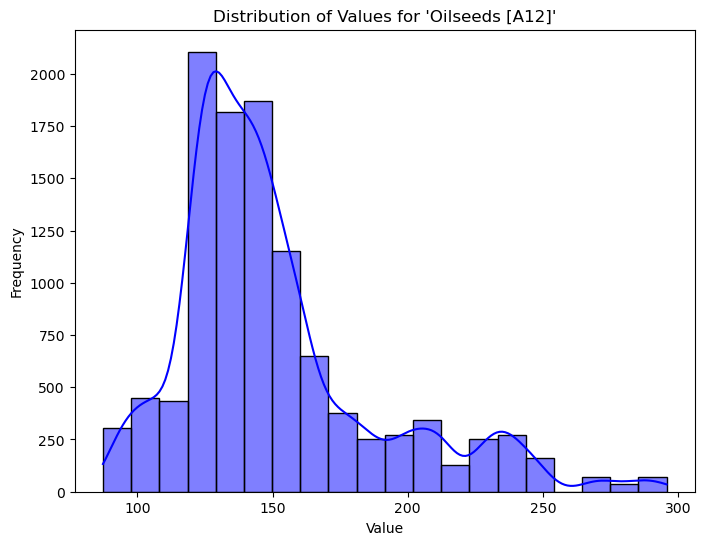

In [165]:
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_df, x='value', bins=20, kde=True, color='blue')
plt.title("Distribution of Values for 'Oilseeds [A12]'")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



/var/folders/dt/k7j_g60901q6ljz3_ydjrw900000gp/T/ipykernel_32450/2600086524.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a futu

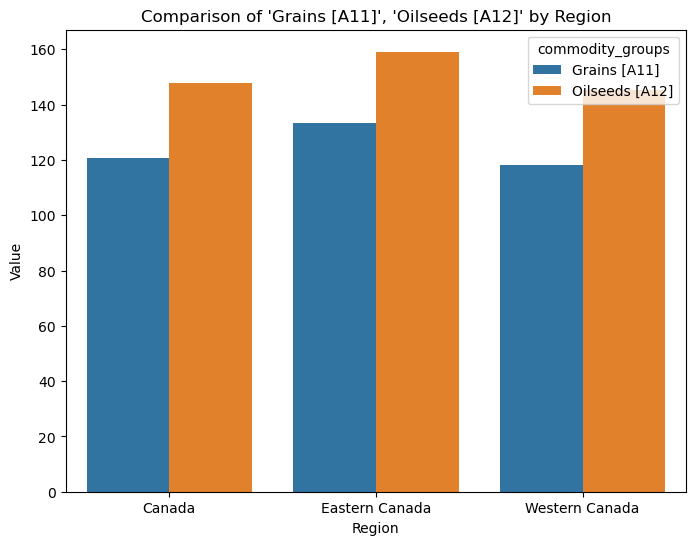

In [189]:
selected_commodity_groups = ['Grains [A11]', 'Oilseeds [A12]']
filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]

plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, x='geo', y='value', hue='commodity_groups', ci=None)
plt.title("Comparison of 'Grains [A11]', 'Oilseeds [A12]' by Region")
plt.xlabel('Region')
plt.ylabel('Value')
plt.show()

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype

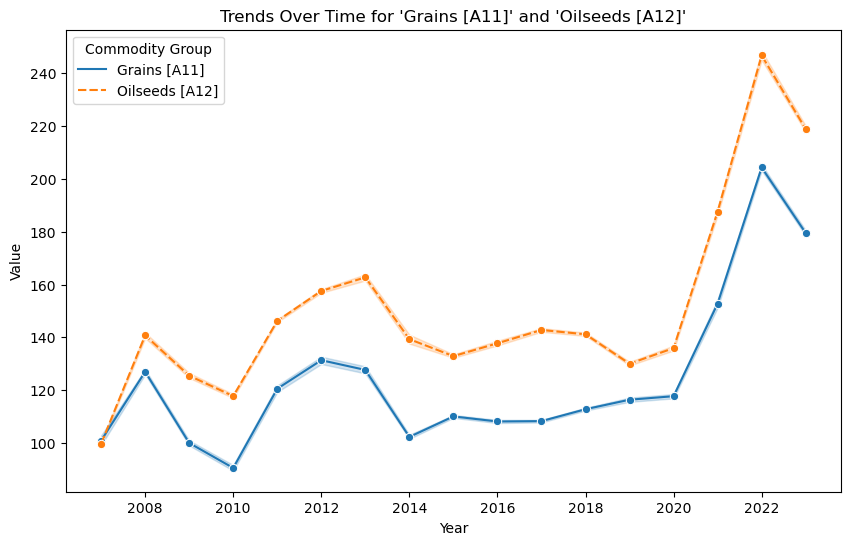

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='year', y='value', hue='commodity_groups', marker='o', style='commodity_groups')
plt.title("Trends Over Time for 'Grains [A11]' and 'Oilseeds [A12]'")
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Commodity Group')
plt.show()


/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option

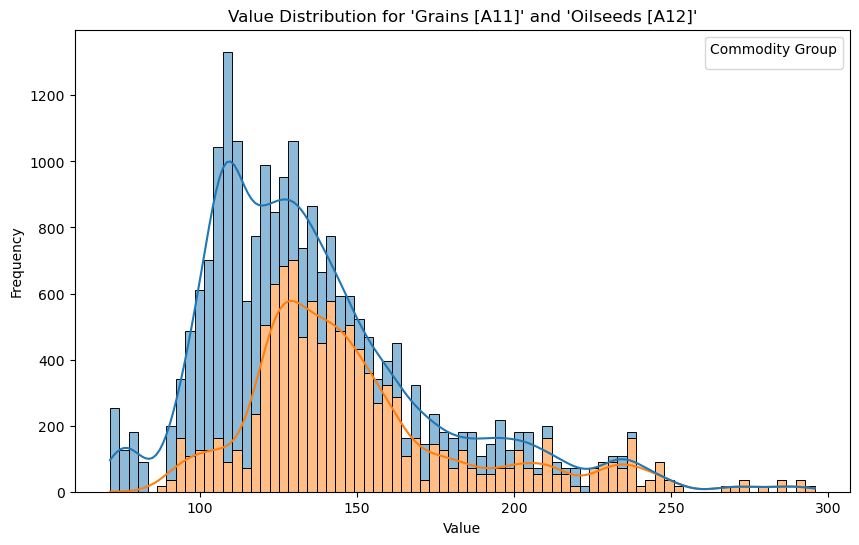

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='value', hue='commodity_groups', multiple='stack', kde=True)
plt.title("Value Distribution for 'Grains [A11]' and 'Oilseeds [A12]'")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(title='Commodity Group')
plt.show()


/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



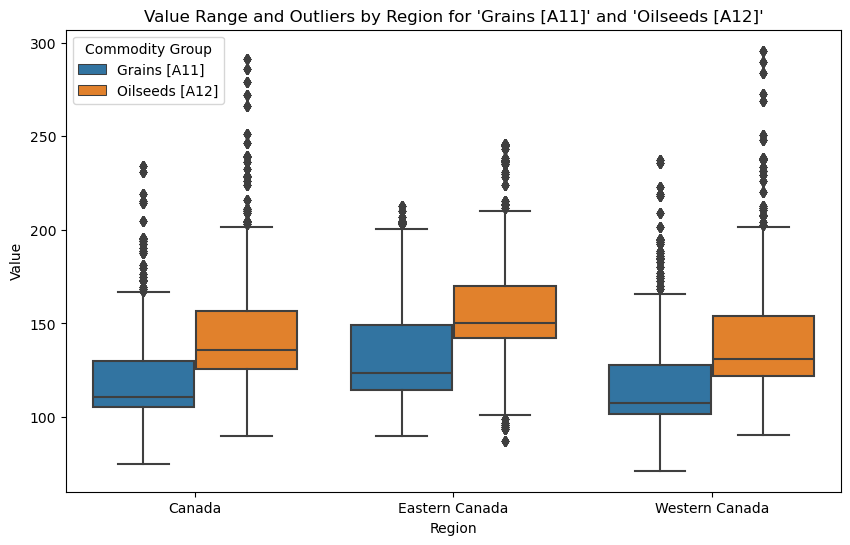

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='geo', y='value', hue='commodity_groups')
plt.title("Value Range and Outliers by Region for 'Grains [A11]' and 'Oilseeds [A12]'")
plt.xlabel('Region')
plt.ylabel('Value')
plt.legend(title='Commodity Group')
plt.show()


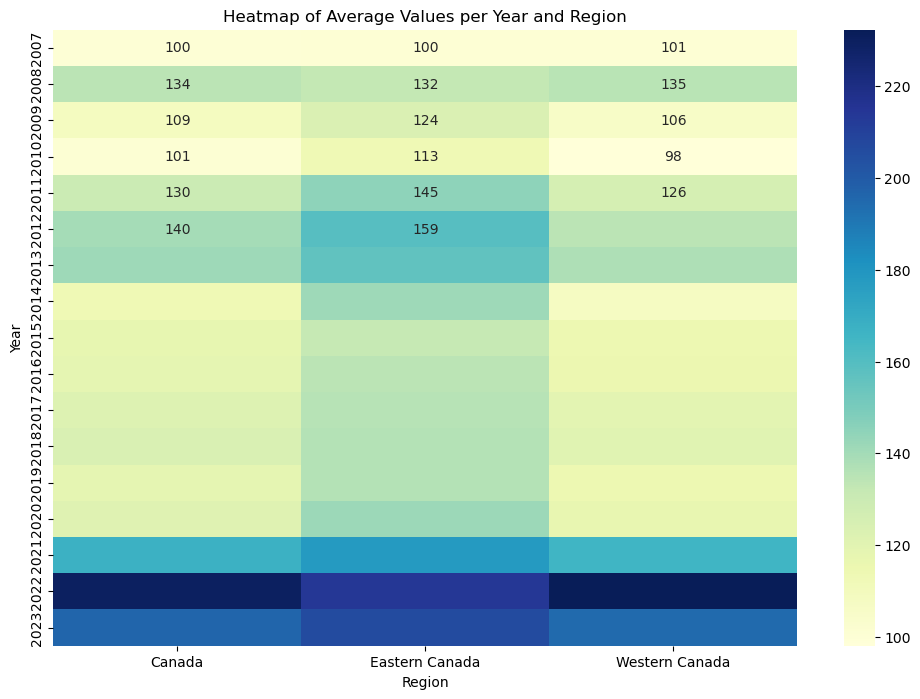

In [187]:

heatmap_data = filtered_df.pivot_table(index='year', columns='geo', values='value', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title("Heatmap of Average Values per Year and Region")
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()


# Regression Module

In [190]:
from sklearn.preprocessing import OneHotEncoder



X = df_food_price.drop(['value', 'commodity_groups'], axis=1)  # Features
y = df_food_price['value']  # Target variable


encoder = OneHotEncoder(sparse=False)
geo_encoded = encoder.fit_transform(df_food_price[['geo']])
geo_df = pd.DataFrame(geo_encoded, columns=encoder.get_feature_names_out(['geo']))

X = pd.concat([X.drop('geo', axis=1), geo_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].abs()  # Take absolute values
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

print(feature_importance_df)

                  Feature  Coefficient
4   mortgage_and_interest    10.588669
6                    year     4.642283
9      geo_Eastern Canada     2.234550
5                 shelter     2.008811
10     geo_Western Canada     1.351499
8              geo_Canada     0.883051
2                    food     0.519709
7                   month     0.512117
1                  energy     0.452266
3                gasoline     0.327668
0               all_items     0.003702


/Users/mustafa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [191]:
df_oil = df_food_price[df_food_price['commodity_groups'] == 'Oilseeds [A12]']

X = df_oil.select_dtypes(include=['number']).drop(columns=['value'])

y = df_oil['value']

print(f"Model's slope (coefficients): {model.coef_}")

print(f"Model's y-intercept: {model.intercept_}")

formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")

model = LinearRegression()

model.fit(X, y)

predicted_values = model.predict(X)

"Predicted values for 'Oilseeds [A12]':", predicted_values

Model's slope (coefficients): [-3.70222568e-03 -4.52266330e-01  5.19708638e-01  3.27667529e-01
 -1.05886685e+01  2.00881145e+00 -4.64228255e+00 -5.12117018e-01
 -8.83051241e-01  2.23454999e+00 -1.35149875e+00]
Model's y-intercept: 9147.517812382113
Model's formula: y = 9147.517812382113 + -0.0037022256843595052*all_items + -0.4522663302458574*energy + 0.5197086382002521*food + 0.3276675290246092*gasoline + -10.588668501232007*mortgage_and_interest + 2.0088114457948443*shelter + -4.642282553883079*year + -0.5121170177803468*month


("Predicted values for 'Oilseeds [A12]':",
 array([118.43912265, 118.42253512, 118.37940752, ..., 213.61065631,
        214.20670186, 213.87495109]))

In [192]:
comparison_df = pd.DataFrame({'Actual_Value': y, 'Predicted_Value': predicted_values})



mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_values)
print("R-squared (R2) score:", r2)

Mean Squared Error: 274.907765118113
R-squared (R2) score: 0.8078738267176843


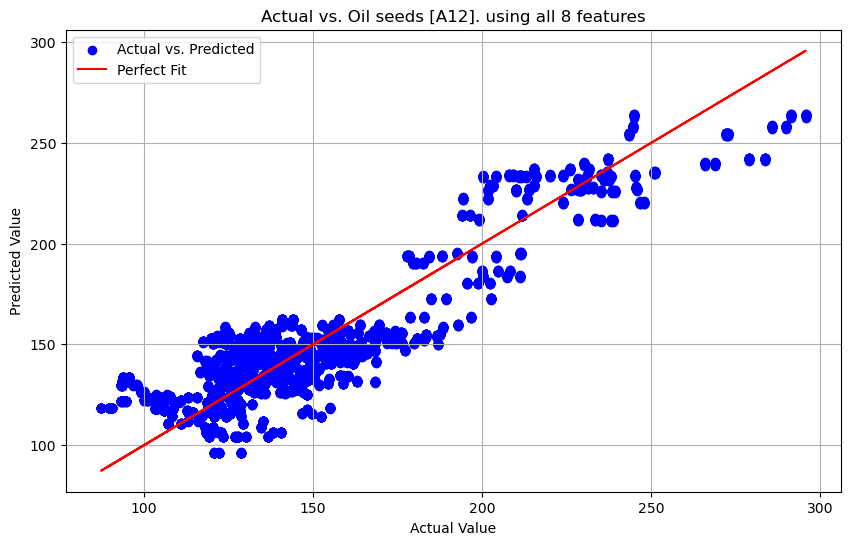

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Oil seeds [A12]. using all 8 features')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

In [175]:
import statsmodels.api as sm


X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     5785.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:19:38   Log-Likelihood:                -46566.
No. Observations:               11016   AIC:                         9.315e+04
Df Residuals:                   11007   BIC:                         9.322e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.519e+

# Model development 

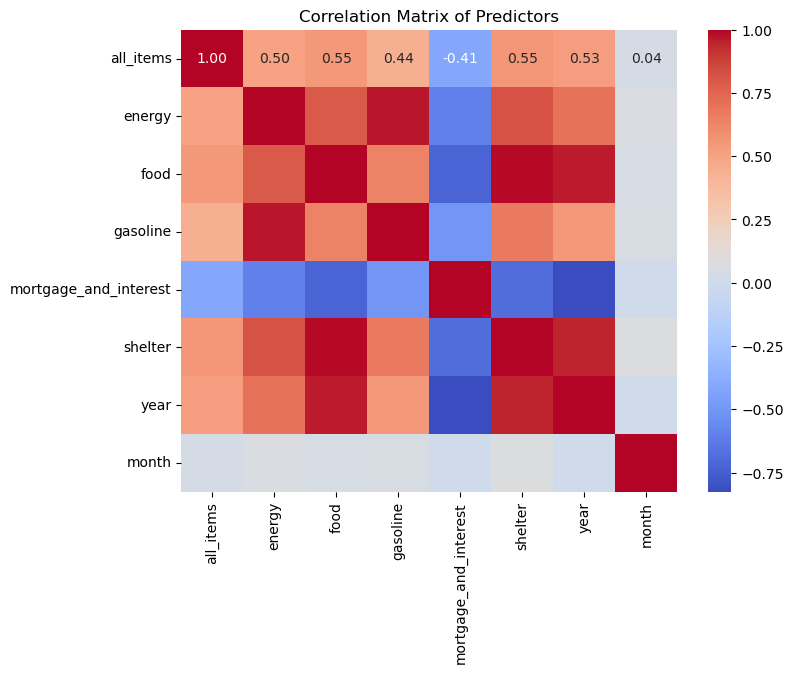

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt


features = df_food_price[['all_items', 'energy', 'food', 'gasoline', 'mortgage_and_interest', 'shelter', 'year', 'month']]

corr_matrix = features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Predictors')
plt.show()


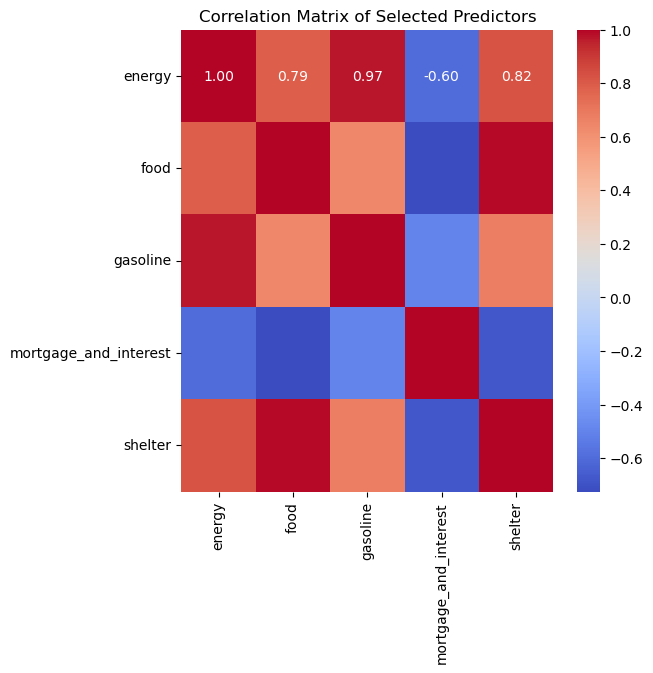

In [177]:
#### import seaborn as sns
import matplotlib.pyplot as plt


# only the columns 
selected_features = df_food_price[['energy', 'food', 'gasoline', 'mortgage_and_interest', 'shelter']]

# correlation matrix for the selected features
corr_matrix = selected_features.corr()

# Plot 
plt.figure(figsize=(6, 6))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Selected Predictors')
plt.show()


In [196]:
df_oil = df_food_price[df_food_price['commodity_groups'] == 'Oilseeds [A12]']

X = df_oil[['energy', 'food', 'gasoline', 'mortgage_and_interest', 'shelter']]

y = df_oil['value']

model = LinearRegression()

model.fit(X, y)

print(f"Model's slope (coefficients): {model.coef_}")

print(f"Model's y-intercept: {model.intercept_}")

formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")


mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_values)
print("R-squared (R2) score:", r2)

predicted_values = model.predict(X)

"Predicted values for oil:", predicted_values

Model's slope (coefficients): [ 1.06609585  0.65854426  0.16466275  2.28792649 -0.4176238 ]
Model's y-intercept: -80.03767802574222
Model's formula: y = -80.03767802574222 + 1.0660958457799912*energy + 0.6585442639379078*food + 0.16466274651892954*gasoline + 2.2879264910326356*mortgage_and_interest + -0.41762379863585286*shelter
Mean Squared Error: 274.907765118113
R-squared (R2) score: 0.8078738267176843


('Predicted values for oil:',
 array([ 98.65386187,  98.65386187,  98.65386187, ..., 212.62382844,
        212.62382844, 212.62382844]))

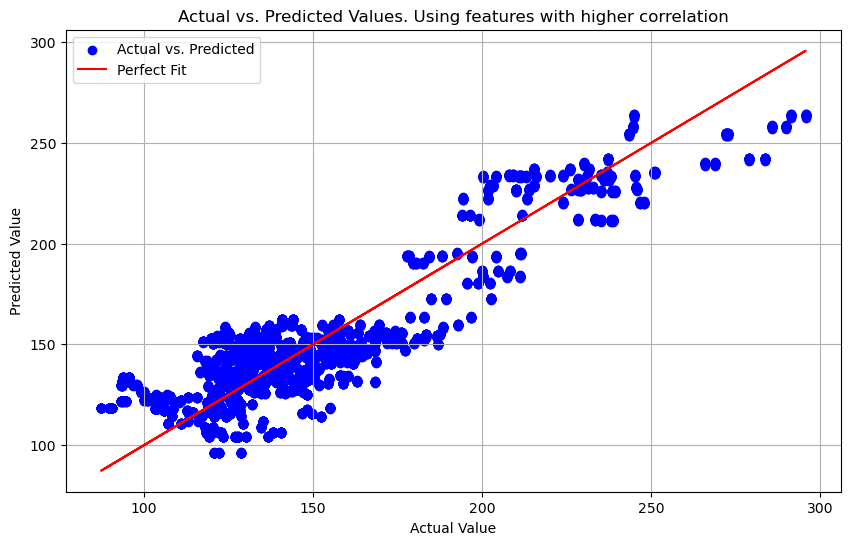

In [195]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values. Using features with higher correlation')
plt.legend()
plt.grid(True)
plt.show()

In [197]:
import statsmodels.api as sm

X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     7460.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:07:41   Log-Likelihood:                -47507.
No. Observations:               11016   AIC:                         9.503e+04
Df Residuals:                   11010   BIC:                         9.507e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -80.03

In [198]:
df_oil = df_food_price[df_food_price['commodity_groups'] == 'Oilseeds [A12]']

X = df_oil[['energy', 'gasoline', 'mortgage_and_interest', 'shelter']]

y = df_oil['value']

model = LinearRegression()

model.fit(X, y)

print(f"Model's slope (coefficients): {model.coef_}")

print(f"Model's y-intercept: {model.intercept_}")

formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")


mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_values)
print("R-squared (R2) score:", r2)

predicted_values = model.predict(X)

"Predicted values for oil:", predicted_values

Model's slope (coefficients): [0.97106686 0.19732076 0.46959882 0.41401215]
Model's y-intercept: -93.84621173820145
Model's formula: y = -93.84621173820145 + 0.9710668600875874*energy + 0.19732076478671495*gasoline + 0.4695988195479925*mortgage_and_interest + 0.41401215021727206*shelter
Mean Squared Error: 326.08468271349227
R-squared (R2) score: 0.7721075567697977


('Predicted values for oil:',
 array([100.06041901, 100.06041901, 100.06041901, ..., 212.57135808,
        212.57135808, 212.57135808]))

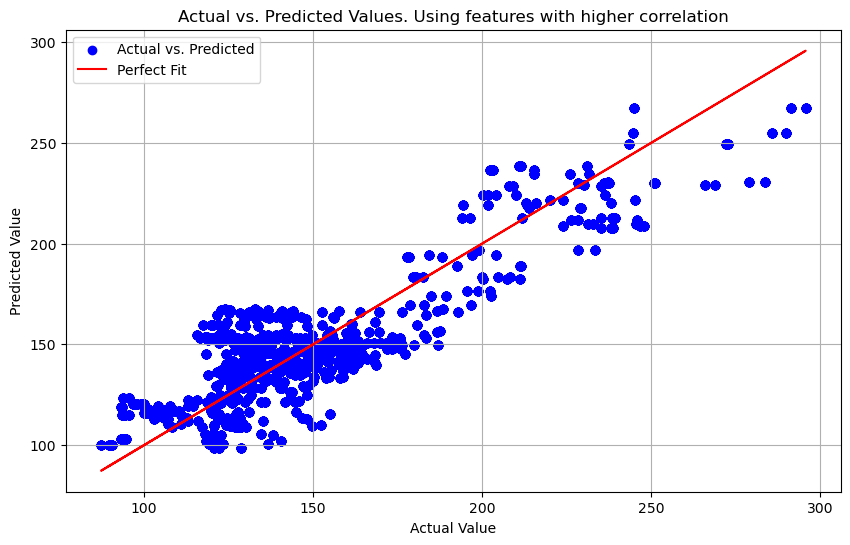

In [199]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values. Using features with higher correlation')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
import statsmodels.api as sm

X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     9230.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:08:49   Log-Likelihood:                -47551.
No. Observations:               11016   AIC:                         9.511e+04
Df Residuals:                   11011   BIC:                         9.515e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -93.84

In [201]:
df_oil = df_food_price[df_food_price['commodity_groups'] == 'Oilseeds [A12]']

X = df_oil[['energy', 'gasoline', 'mortgage_and_interest', ]]

y = df_oil['value']

model = LinearRegression()

model.fit(X, y)

print(f"Model's slope (coefficients): {model.coef_}")

print(f"Model's y-intercept: {model.intercept_}")

formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")


mse = mean_squared_error(y, predicted_values)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_values)
print("R-squared (R2) score:", r2)

predicted_values = model.predict(X)

"Predicted values for oil:", predicted_values

Model's slope (coefficients): [ 1.68285037 -0.17456946 -0.04266623]
Model's y-intercept: -86.33721122732553
Model's formula: y = -86.33721122732553 + 1.682850369683158*energy + -0.17456945958961953*gasoline + -0.04266623341286086*mortgage_and_interest
Mean Squared Error: 328.7218543525196
R-squared (R2) score: 0.7702645033548559


('Predicted values for oil:',
 array([102.30287523, 102.30287523, 102.30287523, ..., 208.31485128,
        208.31485128, 208.31485128]))

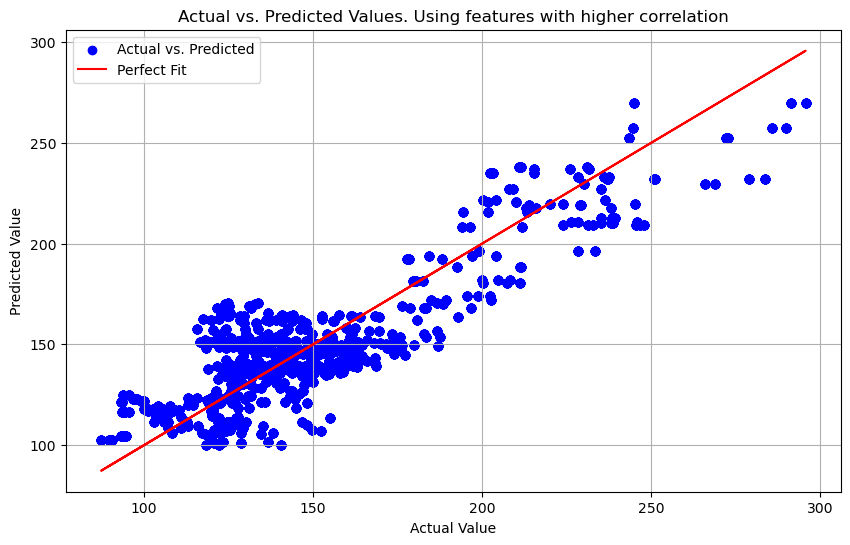

In [202]:
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values. Using features with higher correlation')
plt.legend()
plt.grid(True)
plt.show()

In [203]:
import statsmodels.api as sm

X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 1.214e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:10:28   Log-Likelihood:                -47608.
No. Observations:               11016   AIC:                         9.522e+04
Df Residuals:                   11012   BIC:                         9.525e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -86.33